## World Happiness Report from 2015 - 2019
The **World Happiness Report** is a landmark survey of the **state of global happiness**. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. **The World Happiness 2017**, which ranks **155** countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. **Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations**. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.
The dataset can be downlaoded from Kaggle [World Happiness](https://www.kaggle.com/unsdsn/world-happiness).

Here are the descriptions for some of the columns we'll be working with:

* **Country** — name of the country
* **Region** — name of the region the country belongs to (**`Region` not included in the 2019 dataset**)
* **Happiness Rank** — the rank of the country, as determined by its happiness score
* **Happiness Score** — a score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10
* **Family** — the estimated extent to which family contributes to the happiness score
* **Freedom** — the estimated extent to which freedom contributes to the happiness score
* **Generosity** — the estimated extent to which generosity contributes to the happiness score

**`Did world happiness increase, decrease, or stay about the same from 2015 to 2019?`**

**NOTE: These reports assign each country a `happiness score based on a poll question that asks respondents to rank their life on a scale of 0 - 10`, so "world happiness" refers to this definition specifically.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the datasets
Let's start by reading the **2015, 2016**, and **2017** reports into a pandas dataframe and **adding a Year column to each** to make it easier to distinguish between them.

In [2]:
happiness2015 = pd.read_csv('./data_world_happiness/2015.csv')
happiness2016 = pd.read_csv('./data_world_happiness/2016.csv')
happiness2017 = pd.read_csv('./data_world_happiness/2017.csv')
happiness2018 = pd.read_csv('./data_world_happiness/2018.csv')
happiness2019 = pd.read_csv('./data_world_happiness/2019.csv')

In [3]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
happiness2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [5]:
happiness2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [6]:
happiness2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [7]:
happiness2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Clean Columns names

In [8]:
happiness2015.columns = [col.strip().replace('(', '').replace(')', '').replace(' ', '_') for col in list(happiness2015)]
list(happiness2015)

['Country',
 'Region',
 'Happiness_Rank',
 'Happiness_Score',
 'Standard_Error',
 'Economy_GDP_per_Capita',
 'Family',
 'Health_Life_Expectancy',
 'Freedom',
 'Trust_Government_Corruption',
 'Generosity',
 'Dystopia_Residual']

In [9]:
happiness2016.columns = [col.strip().replace('(', '').replace(')', '').replace(' ', '_') for col in list(happiness2016)]
list(happiness2016)

['Country',
 'Region',
 'Happiness_Rank',
 'Happiness_Score',
 'Lower_Confidence_Interval',
 'Upper_Confidence_Interval',
 'Economy_GDP_per_Capita',
 'Family',
 'Health_Life_Expectancy',
 'Freedom',
 'Trust_Government_Corruption',
 'Generosity',
 'Dystopia_Residual']

In [10]:
happiness2017.columns = [col.strip().replace('..', '_').replace('.', '_') for col in list(happiness2017)]
happiness2017.rename(columns = {'Economy_GDP_per_Capita_': 'Economy_GDP_per_Capita', 
                                'Health_Life_Expectancy_': 'Health_Life_Expectancy', 
                               'Trust_Government_Corruption_': 'Trust_Government_Corruption'}, inplace = True)
list(happiness2017)

['Country',
 'Happiness_Rank',
 'Happiness_Score',
 'Whisker_high',
 'Whisker_low',
 'Economy_GDP_per_Capita',
 'Family',
 'Health_Life_Expectancy',
 'Freedom',
 'Generosity',
 'Trust_Government_Corruption',
 'Dystopia_Residual']

In [11]:
happiness2018.columns = [col.strip().replace(' ', '_') for col in list(happiness2018)]
list(happiness2018)

['Overall_rank',
 'Country_or_region',
 'Score',
 'GDP_per_capita',
 'Social_support',
 'Healthy_life_expectancy',
 'Freedom_to_make_life_choices',
 'Generosity',
 'Perceptions_of_corruption']

In [12]:
happiness2019.columns = [col.strip().replace(' ', '_') for col in list(happiness2019)]
list(happiness2019)

['Overall_rank',
 'Country_or_region',
 'Score',
 'GDP_per_capita',
 'Social_support',
 'Healthy_life_expectancy',
 'Freedom_to_make_life_choices',
 'Generosity',
 'Perceptions_of_corruption']

In [13]:
mean_world_happiness = {'Year': [2015, 2016, 2017, 2018, 2019],
                       
                       'Mean_Happiness_Score': [happiness2015.Happiness_Score.mean(),
                                                happiness2016.Happiness_Score.mean(),
                                                happiness2017.Happiness_Score.mean(),
                                                happiness2018.Score.mean(),
                                                happiness2019.Score.mean(),
                                               ]
                       }

mean_world_happiness_df = pd.DataFrame(mean_world_happiness)
mean_world_happiness_df.set_index('Year', inplace = True)
mean_world_happiness_df

,Mean_Happiness_Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019
2018,5.375917
2019,5.407096


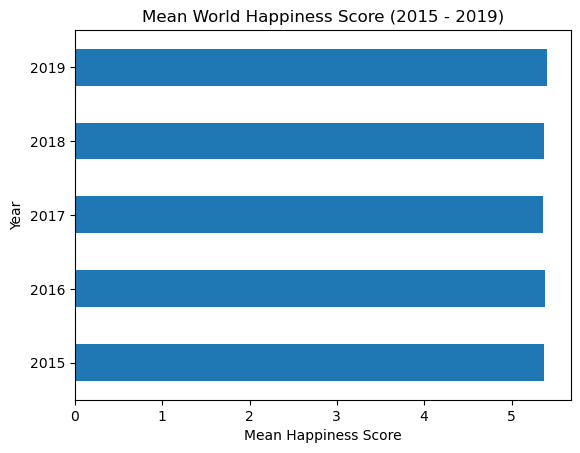

In [14]:
fig, ax = plt.subplots()
mean_world_happiness_df.plot(kind = 'barh', title = 'Mean World Happiness Score (2015 - 2019)', ax = ax)
ax.legend().remove()
ax.set_xlabel('Mean Happiness Score')
plt.show()

**World Happiness Score has not changed during the time period from `2015 - 2019`.**

### Which factors contribute the most to the happiness score in 2015?
We can simply calculate the **`correlation`** of the features with the **happiness score**.

In [15]:
happiness2015.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [16]:
feat_corr = happiness2015.iloc[:, 3:].corr()
feat_corr

,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
Happiness_Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard_Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy_GDP_per_Capita,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health_Life_Expectancy,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust_Government_Corruption,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia_Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [17]:
indicators = feat_corr.iloc[2:, 0]
indicators

Economy_GDP_per_Capita         0.780966
Family                         0.740605
Health_Life_Expectancy         0.724200
Freedom                        0.568211
Trust_Government_Corruption    0.395199
Generosity                     0.180319
Dystopia_Residual              0.530474
Name: Happiness_Score, dtype: float64

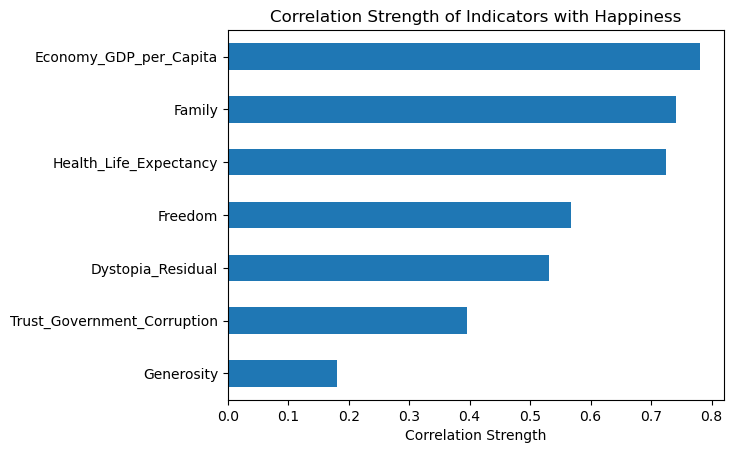

In [18]:
fig, ax = plt.subplots()
indicators.sort_values().plot(kind = 'barh', title = 'Correlation Strength of Indicators with Happiness', ax = ax)
ax.legend().remove()
ax.set_xlabel('Correlation Strength')
plt.show()